In [3]:
import os
!pip install pandas


In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

import pandas as pd

In [5]:
#Reproducible
torch.manual_seed(1)

### Check whether the GPU is available

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Process training and testing data

In [7]:
# Fabricate the dummy test and training data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

In [8]:
# Convert the data as variables
x, y = Variable(x), Variable(y)

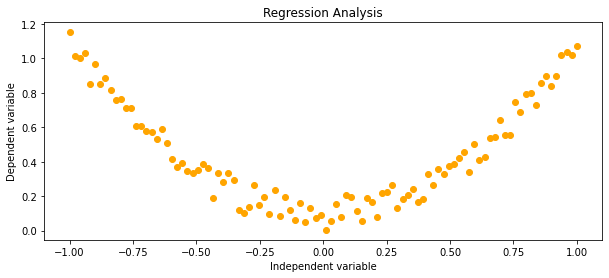

In [9]:
# Visualize data
plt.figure(figsize = (10, 4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

### Build the feedforward neural network

In [10]:
# Build an artificial neural network with one hidden layer
class Model(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Model, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

### Tune the learner

In [11]:
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [12]:
net = Model(n_features = 1, n_hidden = 10, n_output = 1)
# net.to(device)
loss_func = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)
print(net.parameters)

<bound method Module.parameters of Model(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)>


### Train the network

In [74]:
for t in range(1, EPOCHS+1):
#     x, y = x.to(device), y.to(device)
    
    predict = net(x)
    
    #must be (1.nn output, 2.target)
    train_loss = loss_func(predict, y)
    
    #clear gradient for next train
    optimizer.zero_grad()
    
    #backpropagation
    train_loss.backward()
    optimizer.step()
    
    

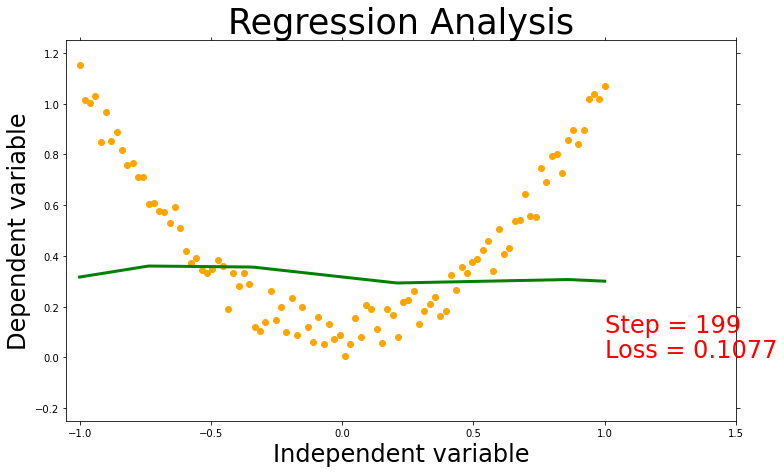

In [13]:
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)